In [69]:
%matplotlib inline
from matplotlib import  pyplot as plt
from sklearn import datasets
from sklearn.decomposition import  PCA
import numpy as np
import networkx as nx

In [70]:
iris = datasets.load_iris()

In [71]:
x = iris.data
y = iris.target

In [72]:
#(1)将鸢尾花数据集画成图的形式
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(x) #降维后的结果保存在reduced_x中

In [73]:
red_x , red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

In [74]:
a = 0
b = 0
c = 0
for i in range(len(reduced_x)):
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
        a += 1
    elif y[i] ==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
        b +=1
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
        c +=1
a

50

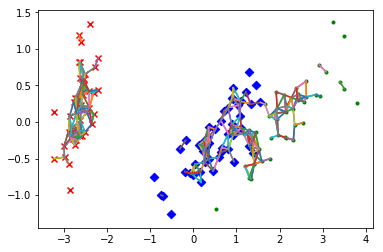

In [43]:

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')

for i in range(len(reduced_x)):
    for j in range(len(reduced_x)):
        if np.linalg.norm(reduced_x[i] - reduced_x[j]) < 0.25:
            plt.plot([reduced_x[i][0], reduced_x[j][0]], [reduced_x[i][1], reduced_x[j][1]])
            

plt.show()

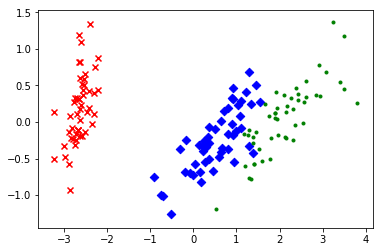

In [8]:
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x,blue_y,c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

In [44]:
#将图转化为邻接矩阵
Matrix_total = []
for j in range(len(reduced_x)):
    Matrix = []
    for i in range(len(reduced_x)):
        if np.linalg.norm(reduced_x[j] - reduced_x[i]) < 0.197:
            Matrix.append(1)
        else:
            Matrix.append(0)
    Matrix_total.append(Matrix)

In [45]:
#用马尔可夫聚类算法进行聚类
# 1.邻接矩阵归一化，normalize为归一化的邻接矩阵
Matrix_total_np = np.array(Matrix_total)
normalize = []
for i in range(len(reduced_x)):
    normalize.append( Matrix_total_np[i]/Matrix_total_np[i].sum())

# 2.不断让normalize相乘，收敛得到稳定概率
M1 = np.dot(normalize,normalize)
M2 = np.power(M1, 3)
normalize1 = []
for i in range(len(reduced_x)):  
    normalize1.append(M2[i]/M2[i].sum())

a = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(normalize1, np.dot(normalize1, normalize1)),normalize1),normalize1),normalize1),normalize1),normalize1),normalize1),normalize1),normalize1),normalize1)
np.around(a) 
a[0 ]#  a为邻接矩阵
a[140]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

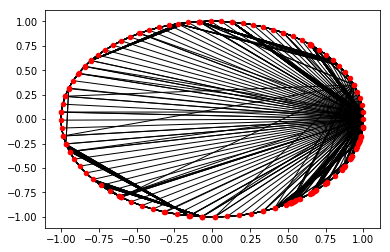

In [46]:
G = nx.Graph()
edglist= []
for i in range(len(a)):
    for j in range(len(a)):
        edglist.append((i, a[i][j]))
G = nx.Graph(edglist)
position = nx.circular_layout(G)
nx.draw_networkx_nodes(G,position, nodelist=range(150), node_color="r", node_size=20)
nx.draw_networkx_edges(G,position)
plt.show()

In [47]:
M = []
for j in range(len(a)):
    M1 = []
    for i in range(len(a)):
        if a[j][i]>0:
            M1.append(i)
    M.append(M1)
for i in range(150):
    print(M[i])

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[5, 18]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 

In [48]:
M_son = []
for i in range(len(M)):
    for j in range(len(M)):
        if M[j] not in M_son:
            M_son.append(M[j])

In [49]:
np.array(M_son)

array([list([0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]),
       list([5, 18]), list([13]), list([14, 33]), list([15]),
       list([16, 32]), list([22]), list([41]), list([50]),
       list([51, 53, 54, 56, 58, 59, 61, 62, 63, 65, 67, 69, 70, 71, 72, 73, 74, 75, 78, 80, 81, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 96, 97, 99, 101, 114, 123, 126, 127, 133, 138, 142, 146, 149]),
       list([52]), list([55, 66, 84, 87]), list([57, 93]), list([60]),
       list([64, 79]), list([68]), list([76]),
       list([77, 110, 115, 116, 137, 145, 147, 148]), list([90]),
       list([98]), list([100, 104]),
       list([102, 112, 120, 124, 129, 136, 139, 140, 141, 143, 144]),
       list([103, 108, 111, 128, 132]), list([105, 122]), list([106]),
       list([107, 130]), list([109, 135]), list([113, 119, 121]),
       list([117]), list([118]), list([125]), list([131]), list([134])],
      dtype

In [50]:
# 暂定的第一类、第二类、第三类
M_0 = M_son[0]
M_9 = M_son[9]
M_21 =M_son[21]

print(np.array(M_son[0]))
print(np.array(M_son[9]))
print(np.array(M_son[21]))
base_list = M_son[0] + M_son[9] + M_son[21]
np.array(base_list)

[ 0  1  2  3  4  6  7  8  9 10 11 12 17 19 20 21 23 24 25 26 27 28 29 30
 31 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49]
[ 51  53  54  56  58  59  61  62  63  65  67  69  70  71  72  73  74  75
  78  80  81  82  83  85  86  88  89  91  92  94  95  96  97  99 101 114
 123 126 127 133 138 142 146 149]
[102 112 120 124 129 136 139 140 141 143 144]


array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  51,  53,  54,  56,  58,  59,  61,  62,  63,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  78,  80,  81,  82,  83,  85,  86,
        88,  89,  91,  92,  94,  95,  96,  97,  99, 101, 114, 123, 126,
       127, 133, 138, 142, 146, 149, 102, 112, 120, 124, 129, 136, 139,
       140, 141, 143, 144])

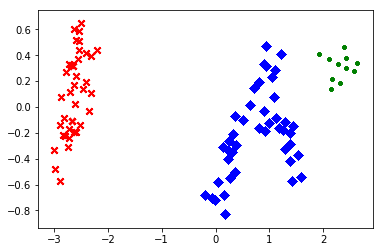

In [16]:
for i in np.array(M_son[0]):
    for j in range(len(M_son[0])):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='r', marker='x')

for i in np.array(M_son[9]):
    for j in range(len(M_son[9])):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='b', marker='D')
        
for i in np.array(M_son[21]):
    for j in range(len(M_son[21])):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='g', marker='.')
plt.show()

In [51]:
M_son.pop(0)
M_son.pop(8)
M_son.pop(19)
np.array(M_son)  #此时M_son剩的都是离散点

array([list([5, 18]), list([13]), list([14, 33]), list([15]),
       list([16, 32]), list([22]), list([41]), list([50]), list([52]),
       list([55, 66, 84, 87]), list([57, 93]), list([60]), list([64, 79]),
       list([68]), list([76]),
       list([77, 110, 115, 116, 137, 145, 147, 148]), list([90]),
       list([98]), list([100, 104]), list([103, 108, 111, 128, 132]),
       list([105, 122]), list([106]), list([107, 130]), list([109, 135]),
       list([113, 119, 121]), list([117]), list([118]), list([125]),
       list([131]), list([134])], dtype=object)

In [52]:
a = []
b = []
for i in range(len(M_son)):
    for j in range(len(M_son[i])): #M_son[i] 代表子列表, j用来遍历子列表
        
        if len(M_son[i]) == 1: #对于子列表中有一个元素值的
            length = np.linalg.norm(reduced_x[M_son[i][0]] - reduced_x[base_list[0]])
            for k in range(len(base_list)):
                if np.linalg.norm(reduced_x[M_son[i][0]] - reduced_x[ base_list[k]]) <length:
                    length = np.linalg.norm(reduced_x[M_son[i][0]] - reduced_x[ base_list[k]])
                    a.append((i,k))
                    
                else:
                    pass
                
            if base_list[a[-1][1]] in M_0:
                    M_0.append(M_son[a[-1][0]][0])
            if base_list[a[-1][1]] in M_9:
                    M_9.append(M_son[a[-1][0]][0])
            if base_list[a[-1][1]] in M_21:
                    M_21.append(M_son[a[-1][0]][0])
                    
                    
                    
            
        else:  #对于子列表中有多个元素值的
            length = np.linalg.norm(reduced_x[M_son[i][0]] - reduced_x[base_list[0]])    
            for k in range(len(base_list)):
                if np.linalg.norm(reduced_x[M_son[i][j]] - reduced_x[ base_list[k]]) <length:
                    length = np.linalg.norm(reduced_x[M_son[i][j]] - reduced_x[ base_list[k]])
                    b.append((i,k))
                else:
                    pass
                
            if base_list[b[-1][1]] in M_0:
                M_0.extend((M_son[b[-1][0]]))
            if base_list[b[-1][1]] in M_9:
                M_9.extend((M_son[b[-1][0]]))
            if base_list[b[-1][1]] in M_21:
                M_21.extend((M_son[b[-1][0]]))
                        

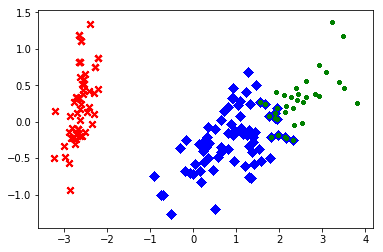

In [53]:
for i in np.array(M_0):
    for j in range(len(M_0)):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='r', marker='x')

for i in np.array(M_9):
    for j in range(len(M_9)):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='b', marker='D')
        
for i in np.array(M_21):
    for j in range(len(M_21)):
        plt.scatter(reduced_x[i][0],reduced_x[i][1], c='g', marker='.')
plt.show()

In [63]:
np.array(M_0)
M_0_new =[]
for i in M_0:
    if i not in M_0_new:
        M_0_new.append(i)
len(M_0_new)

50

In [55]:
np.array(M_9)
M_9_new =[]
for i in M_9:
    if i not in M_9_new:
        M_9_new.append(i)
len(M_9_new)

77

In [64]:
np.array(M_21)
M_21_new =[]
for i in M_21:
    if i not in M_21_new:
        M_21_new.append(i)
len(M_21_new)

36

In [57]:
M_9_new_1 = []
for i in range(len(M_9_new)):
        if M_9_new[i] not in M_21_new:
            M_9_new_1.append(M_9_new[i])
len(M_9_new_1)  

64

In [62]:
len(M_9_new_1)

64

In [78]:
#计算正确率
print(a/len(M_0_new)) #第一分簇的正确率
print(b/len(M_9_new_1)) #第二分簇的正确率
print(len(M_21_new)/c) #第三分簇的正确率
acc = (a/len(M_0_new) + b/len(M_9_new_1) + len(M_21_new)/c) / 3
acc

1.0
0.78125
0.72


0.8337499999999999